Image Segmentation

Mount Google Drive

Import libraries

Data Preparation

Thresholding

K-means

1. Mount Google Drive

In [ ]:
import io
import requests
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


2. Import Libraries

In [17]:
# import libraries of python OpenCV
from skimage.color import rgb2gray
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

3. Data Preparation

In [18]:
# Load from Google Drive.
img1_DIR = "/content/gdrive/MyDrive/gold glitter.jpg"
img2_DIR = "/content/gdrive/MyDrive/gold glitter.PNG"

Show the image using matplotlib.

plt.imshow or cv_imshow?

* OpenCV uses BGR as its default colour order for images,
* matplotlib uses RGB

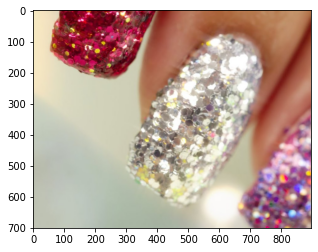

In [19]:
image = plt.imread(img1_DIR)
plt.imshow(image)

In [20]:
image.shape

(701, 896, 3)

* It is a three-channel image (RGB).
* We need to convert it into grayscale so that we only have a single channel.
* You may resize your image if it's too big (smaller image is faster to process)

(281, 360, 3)

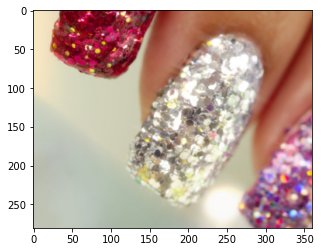

In [21]:
# to prevent image from being skewed or distorted 
# calculate the ratio of the new image to the old image
r = 360 / image.shape[1]
dim = (360, int(image.shape[0] * r))

# perform the actual resizing of the image and show it
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized)
cv2.waitKey(0)

resized.shape

(281, 360)

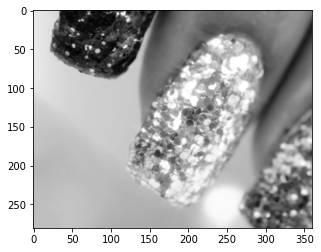

In [22]:
gray = rgb2gray(resized)
plt.imshow(gray, cmap='gray')
gray.shape

nNow we have a smaller image in grayscale (1 channel). Next we can proceed with thresholding.

4. Thresholding

Next, apply a certain threshold to this image.

This threshold should separate the image into two parts – the foreground and the background.

In [23]:
# Before that, let’s quickly check the shape of this image
gray.shape

(281, 360)

The height and width of the grayscale image is 341 and 360 respectively.

Height = 341

width = 360

We will take the mean of the pixel values and use that as a threshold, T

If the pixel value > T → then it belongs to an object.

If the pixel value < T → then it will be treated as the background.

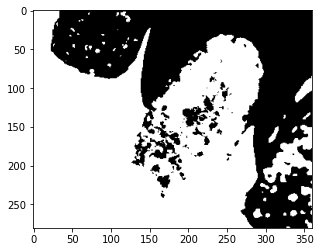

In [24]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

The darker region (black) represents the background and the brighter (white) region is the foreground.
We can define multiple thresholds as well to detect multiple objects.

5. K-means

The key advantage of using k-means algorithm is that it is simple and easy to understand. We are assigning the points to the clusters which are closest to them.

Based on our reshaped image, it’s a 3-dimensional image of shape (341, 360, 3).

Steps for clustering the image using k-means:

1. convert it into a 2-dimensional array whose shape will be (length*width, channels) → (341 x 360, 3).
2. fit the k-means algorithm
3. convert back to 3-dimensional

In [25]:
resized = resized/255 #dividing by 255 to bring the pixel values between 0 and 1
pic_n = resized.reshape(resized.shape[0]*resized.shape[1], resized.shape[2])
pic_n.shape

(101160, 3)

We can see that the image has been converted to a 2-dimensional array.

Next, fit the k-means algorithm on this reshaped array and obtain the clusters.

What the parameter means?

* The clustercenters function → return the cluster centers
* labels_ function → return the label for each pixel (tell us which pixel of the image belongs to which cluster)

Let's try with 5 clusters → k = 5

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

Now, let’s bring back the clusters to their original shape (3-dimensional image), and plot the results.


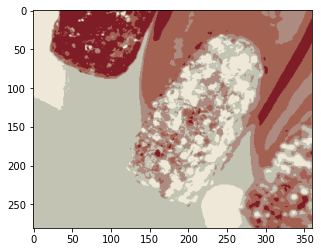

In [27]:
cluster_pic = pic2show.reshape(resized.shape[0], resized.shape[1], resized.shape[2])
plt.imshow(cluster_pic)

Amazing, right? We are able to segment the image pretty well using just 5 clusters.

Now, let's try with k = 10

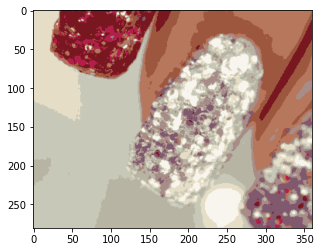

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

cluster_pic = pic2show.reshape(resized.shape[0], resized.shape[1], resized.shape[2])
plt.imshow(cluster_pic)

Advantages:

* k-means works really well when we have a small dataset.
* It can segment the objects in the image and give impressive results.

Disadvantages:

* Not great for large dataset (more number of images).
* It looks at all the samples at every iteration → thus computationally expensive to implement.